# Yelp Data Challenge - Clustering and PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('last_2_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2015-03-16,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g


## Cluster the review text data for all the restaurants

### Define feature variables - the text of the review

In [4]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values
documents.dtype, documents.shape

(dtype('O'), (515752,))

In [5]:
documents[10]

"This was supposed to be a very special dinner for 10 for my husband's 50th birthday. Four other couples flew in  from all over to celebrate with us and the first problem is that they seated us at a table for 9. The hostess called that morning and said 9, I corrected her and let her know there were 10 and she said she'd call me back by noon to confirm but I never heard back. Regardless, this Open Table reso said 10 so I didn't worry about it until we all sat down, realized we were one short, and had to get back up and go wait in the bar. \nWhen were seated at a proper table, the appetizers that I'd pre-ordered were sitting out on the table, including fried oysters which had gone ice cold and soggy (very gross). We had to ask for bread long after entrees were served and it was cold, mushy things that looked like they used to be popovers (I thought I'd remembered a wonderful bread service before...?) And so on with the poor service...\nI've eaten here before and service and food were fiv

### Define target variable (any categorical variable that may be meaningful)

#### I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [6]:
# Make a column and take the values, save to a variable named "target"
df['favorable'] = (df['stars'] > 4)
target = df['favorable'].values
target[:10]

array([ True, False,  True,  True,  True, False,  True,  True,  True,
       False])

#### The statistic of the target variable

In [7]:
# To be implemented
target.mean(), target.std()

(0.46397299477268145, 0.49870036584541505)

### Create training dataset and test dataset

In [8]:
from sklearn.cross_validation import train_test_split

/Users/yaru/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
documents_train, documents_test, target_train, target_test = train_test_split(
    documents,
    target,
    test_size = 0.8,
    random_state = 42
)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)

In [12]:
# Train the model with your training data
vector_train = vectorizer.fit_transform(documents_train).toarray()
vector_train.shape

(103150, 1000)

In [13]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

In [14]:
# Use the trained model to transform all the reviews
vector_documents = vectorizer.transform(documents).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(vector_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all data

In [16]:
assigned_cluster = kmeans.predict(vector_documents)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [17]:
print('cluster centers:')
print(kmeans.cluster_centers_)

cluster centers:
[[0.0031773  0.00701481 0.00206869 ... 0.00070825 0.00300868 0.00555389]
 [0.00439499 0.01938376 0.00304842 ... 0.00353583 0.00066224 0.00197983]
 [0.00165061 0.00698702 0.00241687 ... 0.00091545 0.00258091 0.00640777]
 ...
 [0.00234046 0.00597869 0.00241897 ... 0.00127422 0.0041039  0.00732105]
 [0.00204096 0.00534777 0.00135414 ... 0.0011432  0.0023761  0.00553087]
 [0.00328747 0.00692058 0.00172721 ... 0.00161112 0.00217866 0.00633348]]


#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [18]:
n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n_feat:-1]

In [19]:
print('Top features for each cluster:')
for num, centroid in enumerate(top_centroids):
    print('%d: %s' %(num, ', '.join(words[i] for i in centroid)))

Top features for each cluster:
0: burger, fries, burgers, good, shake, cheese, place, food, great
1: food, order, time, just, service, minutes, came, like, didn
2: sushi, rolls, place, roll, ayce, great, good, service, fresh
3: great, food, service, place, amazing, awesome, friendly, staff, love
4: chicken, fried, food, rice, good, ordered, place, like, great
5: place, food, best, vegas, delicious, amazing, love, service, like
6: good, food, really, place, service, nice, pretty, like, just
7: pizza, crust, good, place, great, slice, cheese, just, best


#### Try different k

In [20]:
# k = 5 which is smaller than the default value 8
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(vector_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
assigned_cluster = kmeans.predict(vector_documents)

In [22]:
n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n_feat:-1]

In [23]:
print('Top features for each cluster:')
for num, centroid in enumerate(top_centroids):
    print('%d: %s' %(num, ', '.join(words[i] for i in centroid)))

Top features for each cluster:
0: food, place, good, best, vegas, service, amazing, love, delicious
1: great, food, service, place, good, amazing, awesome, friendly, staff
2: food, order, time, just, service, minutes, like, came, didn
3: pizza, crust, good, place, great, slice, cheese, just, best
4: good, chicken, ordered, burger, like, fries, food, really, sauce


In [24]:
# k = 10 which is larger than the default value 8
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10)
kmeans.fit(vector_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
assigned_cluster = kmeans.predict(vector_documents)

In [26]:
n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n_feat:-1]

In [27]:
print('Top features for each cluster:')
for num, centroid in enumerate(top_centroids):
    print('%d: %s' %(num, ', '.join(words[i] for i in centroid)))

Top features for each cluster:
0: place, food, vegas, best, delicious, like, service, just, love
1: good, food, really, place, service, pretty, nice, like, just
2: breakfast, eggs, food, great, good, place, service, coffee, pancakes
3: burger, fries, burgers, good, shake, cheese, place, food, great
4: great, food, service, place, awesome, friendly, good, staff, love
5: order, food, minutes, time, service, just, came, didn, got
6: amazing, food, place, service, great, best, definitely, vegas, love
7: chicken, fried, food, good, rice, ordered, place, like, sauce
8: pizza, crust, good, place, great, slice, cheese, just, best
9: sushi, rolls, place, roll, ayce, great, good, fish, fresh


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [28]:
np.unique(assigned_cluster)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [29]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0,vector_documents.shape[0])[assigned_cluster == i]
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print('='*10)
    print('Cluster %d:' %i)
    for review_index in sample_reviews:
        print('  %s - ' %df.ix[review_index]['stars'],)
        print('%s' %df.ix[review_index]['text'])
    print()

Cluster 0:


/Users/yaru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


  2 - 
I love the JW Marriott but this buffet could definitely use some improvements with selection. Stayed there for a few days for work and had to eat there several times. Every time I went to the ice cream machine it was empty. My saving grace was the salad bar.
  5 - 
We tried this place on a recommendation from a friend & we were not disappointed! The salmon lover roll was by far, my favorite. The food quality & service was excellent!

Cluster 1:
  2 - 
Call ahead if you're looking for vegetarian fare. There is a lot listed on the menu, but they were out of basically all of it. Food looked good, but I left hungry.
  4 - 
I had the French dip sandwich and it was good. The mac n cheese has amazing flavor. We ordered to go and they forgot a sandwich and the au jus spilled all over everything. They gladly remade the sandwich since the spilled au jus made it soggy. The fries are also good and cut differently (on the thick side). I'd eat here again.

Cluster 2:
  5 - 
Hash House is famo

## Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [30]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
most_reviewed_restaurant = df['business_id'].value_counts().index[0]
df_top_restaurant = df[df['business_id'] == most_reviewed_restaurant].copy().reset_index()
df_top_restaurant

,index,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,favorable
0,228947,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2015-02-25,0,pWnR3FNqTq1AoaZVj6cayw,3,"Date & Time: Tuesday, 2/24/15 @ 2pm\n\nThe buf...",0,RFIZhrka0gCpiL62M5E93g,False
1,228948,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2017-07-02,0,Xci8QJaDOB7OazJIP9U0Cw,5,I'm staying at Caesar's Palace for 4th of July...,0,J90_7u_8vPYa03GMohNxAA,True
2,228949,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2015-12-29,0,IZO6o6l-T8VKH-4eTzJNzw,3,Great buffet and beautiful food presentation. ...,0,KGGA28eimhhOgHmSfyhEgw,False
3,228950,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2016-03-19,0,KNYBYYO0Iq1QEsP4noql5g,4,"By far the best buffet in Vegas!! A must stop,...",2,gJGXoQ6UzqK-cWVO8MnGHA,False
4,228951,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2015-10-14,0,9SGHR-0E37W9rC56uJeFPA,5,Wholly schneikeis! This was simply the best ...,0,ej7th1TBk_WA_y4GU0n_iw,True
5,228952,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2015-07-20,0,EXZZw6XfEG1OwBre0L2daQ,5,My husband and I ate here back in March on a S...,0,pIzyC-oPzQccanodA2ckWQ,True
6,228953,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2016-01-29,0,sFnI-FJQTAS1oKBKqCBhkg,4,40 bucks for lunch 50 for dinner. Be prepared ...,0,i25irB9ppeha7IXK1HcM2g,False
7,228954,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2016-04-07,0,BQDV2B8hQZkmKjjViZzP8w,1,"Worst service ever, estevan, took forever to c...",0,3H3yQmyzGuQ0ToooAp1uEA,False
8,228955,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2016-12-30,0,w0clsHBC5Z6cZkM9WhdY4Q,2,"For the price we paid for our family , I would...",0,eOeYJk4b7R9RjSvb4RZj8A,False
9,228956,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2017-04-17,0,Cvu2u-qIT1VNMywoV21ziA,5,Really loved this place! We heard great things...,0,i05OLRVJCeN3ZD1dIM2mrQ,True


Load restaurant profile information from the business dataset

In [31]:
# Load business dataset 
# Take a look at the most reviewed restaurant's profile 
import json
import pandas as pd

business_file ='/Users/yaru/Downloads/dataset/business.json'
with open(business_file) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

df_business[df_business['business_id'] == most_reviewed_restaurant]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
119907,3570 S Las Vegas Blvd,"{'RestaurantsTableService': True, 'GoodForMeal...",RESDUcs7fIiihp38-d6_6g,"[Sandwiches, Buffets, Restaurants, Breakfast &...",Las Vegas,"{'Monday': '7:30-22:00', 'Tuesday': '7:30-22:0...",1,36.116113,-115.176222,Bacchanal Buffet,The Strip,89109,7009,4.0,NV


### Vectorize the text feature

In [32]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values
documents_top_restaurant.dtype, documents_top_restaurant.shape

(dtype('O'), (4059,))

### Define target variable (for later classification use)

#### Again, use perfect (5 stars) and imperfect (1-4 stars) rating

In [33]:
df_top_restaurant['favorable'] = (df_top_restaurant['stars'] > 4)
target_top_restaurant = df_top_restaurant['favorable'].values.astype(int)
target_top_restaurant

array([0, 1, 0, ..., 0, 0, 1])

#### Check the statistic of the target variable

In [34]:
target_top_restaurant.mean(), target_top_restaurant.std()

(0.3855629465385563, 0.4867280152149275)

### Create training dataset and test dataset

In [35]:
from sklearn.cross_validation import train_test_split

In [36]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
X_train, X_test, y_train, y_test = train_test_split(
    documents_top_restaurant,
    target_top_restaurant,
    test_size = 0.4,
    random_state = 42
)

### Get NLP representation of the documents

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [39]:
# Train the model with your training data
vector_train = vectorizer.fit_transform(X_train).toarray()
vector_train.shape

(2435, 1000)

In [40]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

In [41]:
# Use the trained model to transform the test data
vector_test = vectorizer.transform(X_test).toarray()

In [42]:
# Use the trained model to transform all the data
vector_documents_top_restaurant = vectorizer.transform(documents_top_restaurant).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)

kmeans.fit(vector_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [44]:
assigned_cluster = kmeans.predict(vector_documents_top_restaurant)

#### Inspect the centroids

In [45]:
print('Cluster centers:')
print(kmeans.cluster_centers_)

Cluster centers:
[[0.00275671 0.00523989 0.00258222 ... 0.0096121  0.0024632  0.00354609]
 [0.00293018 0.01812671 0.00329069 ... 0.01262953 0.00153684 0.00153858]
 [0.00511702 0.00805971 0.00328207 ... 0.00457201 0.00228777 0.0028822 ]
 [0.00155655 0.00140009 0.00073768 ... 0.00882744 0.00110385 0.00630264]
 [0.00582405 0.01039889 0.00285412 ... 0.00887689 0.00285915 0.00445073]]


#### Find the top 10 features for each cluster.

In [46]:
n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n_feat:-1]

In [47]:
print('Top features for each cluster:')
for num, centroid in enumerate(top_centroids):
    print('%d: %s' %(num, ', '.join(words[i] for i in centroid)))

Top features for each cluster:
0: crab, legs, good, buffet, prime, food, rib, king, like
1: line, wait, time, food, long, buffet, hour, hours, got
2: food, good, buffet, place, service, price, great, worth, quality
3: best, buffet, vegas, great, food, las, buffets, selection, worth
4: buffet, seafood, station, section, food, dessert, asian, good, vegas


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [48]:
np.unique(assigned_cluster)

array([0, 1, 2, 3, 4], dtype=int32)

In [49]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0,vector_documents_top_restaurant.shape[0])[assigned_cluster == i]
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print('='*10)
    print('Cluster %d:' %i)
    for review_index in sample_reviews:
        print('  %s - ' %df_top_restaurant.ix[review_index]['stars'],)
        print('%s' %df_top_restaurant.ix[review_index]['text'])
    print()

Cluster 0:
  3 - 
came sunday for brunch. it said $49 but we were a group of 9 so after gratuity and tax its $63 per person. kind of pricey and it did n not include mimosas so we paid extra $5 to add on for everyone. we waited about an hour so by the time we sat we were hungry! lol.

ceviche was delicious and one of the best things from the buffet. I ate lot of crab legs to make up for the $68 price tag. I just wish there were warm ones. the "best things" listed we tried wasn't that great. all the dessert sample were good and the juice bar area was cute and fresh!

there is a two-hour limit for buffet. chose your food wisely haha!
  3 - 
I mean it's GOOD, but it's not life changing or anything.   The wait is obnoxious, someone taking your picture as you walk in is also obnoxious, the lines to get to the food are obnoxious, and the way the whole buffet is spread out is obnoxious.  

That said, the pork belly, crab legs, dim sum, and prime rib were all excellent.

Cluster 1:
  3 - 
It's 

/Users/yaru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


## Use PCA to reduce dimensionality

### Stardardize features

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(vector_train)
X_test_scaled = scaler.transform(vector_test)

### Use PCA to transform data (train and test) and get princial components

In [51]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50
pca = PCA(n_components)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [52]:
X_train_pca.shape, X_test_pca.shape

((2435, 50), (1624, 50))

### See how much (and how much percentage of) variance the principal components explain

In [53]:
pca.components_.shape

(50, 1000)

In [54]:
print(pca.explained_variance_[:20])
print(pca.explained_variance_ratio_[:20])

[8.43254548 6.55346435 4.37463374 4.13038076 3.77419075 3.50653683
 3.41229934 3.26090172 3.23232105 3.09635123 3.05504315 2.98542381
 2.90704262 2.85522949 2.84904505 2.79261396 2.77284587 2.7272591
 2.69346439 2.6648918 ]
[0.00842908 0.00655077 0.00437284 0.00412868 0.00377264 0.0035051
 0.0034109  0.00325956 0.00323099 0.00309508 0.00305379 0.0029842
 0.00290585 0.00285406 0.00284788 0.00279147 0.00277171 0.00272614
 0.00269236 0.0026638 ]


### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

Text(0,0.5,'Proportion of variance explained')

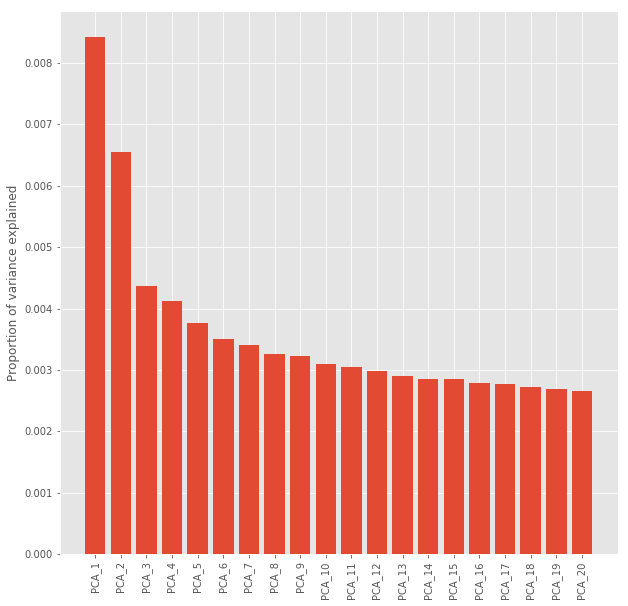

In [55]:
n_col_to_display = 20
pca_range = np.arange(n_col_to_display)+1
pca_names = ['PCA_%s' % i for i in pca_range]
plt.figure(figsize=(10,10))
plt.bar(pca_range, pca.explained_variance_ratio_[:n_col_to_display],align='center')
xticks = plt.xticks(pca_range, pca_names, rotation =90)
plt.ylabel('Proportion of variance explained')

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [56]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
X_train_scaled.shape

(2435, 1000)

In [58]:
# Get score for training set
model_lr.score(X_train_scaled, y_train)

0.9971252566735113

In [59]:
# Get score for test set
model_lr.score(X_test_scaled, y_test)

0.7112068965517241

#### Use (Stardardized + PCA) tf-idf vectors as features

In [60]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
# Get score for training set
model_lr.score(X_train_pca, y_train)

0.7860369609856263

In [62]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_lr.score(X_test_pca, y_test)

0.7875615763546798

PCA preprocessing performed a better test score than non-PCA preprocessing, but a worse training score than non-PCA preprocessing. Compared the trainging and test scores, we found PCA preprocessing performed better in this dataset, while non-PCA preprocessing showed overfitting in this dataset due to too many featured included in the model.

#### Plot the coefficients against principal components

In [63]:
pca_range = np.arange(pca.n_components)
pca_names = ['pc_%s' % i for i in pca_range]
df_coeff = pd.DataFrame(list(zip(pca_names, model_lr.coef_.flatten()))).sort_values(by=[1],ascending=False)
df_coeff

,0,1
6,pc_6,0.224356
5,pc_5,0.185946
32,pc_32,0.118948
20,pc_20,0.068761
38,pc_38,0.061703
10,pc_10,0.059953
23,pc_23,0.059659
11,pc_11,0.054803
36,pc_36,0.049036
9,pc_9,0.044148


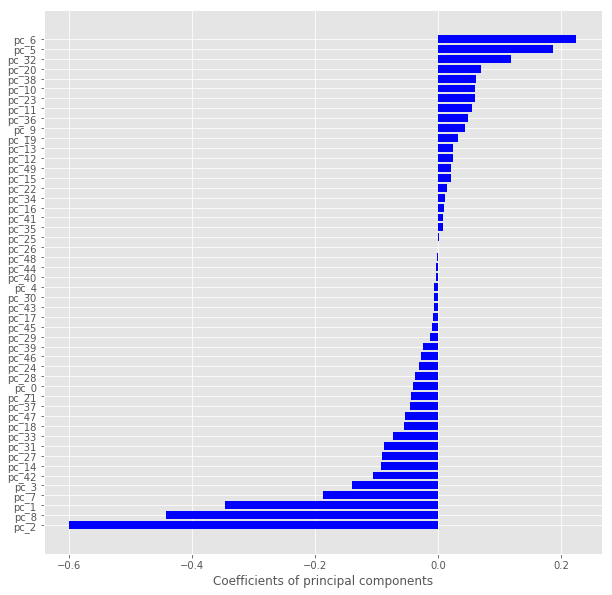

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(pca_range, df_coeff[1],align='center',color='blue')
ax.set_yticks(pca_range)
ax.set_yticklabels(df_coeff[0])
ax.invert_yaxis() 
ax.set_xlabel('Coefficients of principal components')
plt.show()

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [65]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_features = 'auto',
                                  max_depth = 20,
                                  n_estimators = 200,
                                  min_samples_split = 2,
                                  min_samples_leaf = 5,
                                  random_state = 42)
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [66]:
# Get score for training set
model_rf.score(X_train_scaled, y_train)

0.8595482546201232

In [67]:
# Get score for test set
model_rf.score(X_test_scaled, y_test)

0.7327586206896551

#### Use (Stardardized + PCA) tf-idf vectors as features

In [68]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_features = 'auto',
                                  max_depth = 20,
                                  n_estimators = 200,
                                  min_samples_split = 2,
                                  min_samples_leaf = 5,
                                  random_state = 42)
model_rf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [69]:
# Get score for training set
model_rf.score(X_train_pca, y_train)

0.9691991786447639

In [70]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_rf.score(X_test_pca, y_test)

0.7616995073891626

PCA preprocessing performed a better traing and test scores than non-PCA preprocessing based on the same random forest model. Compared the trainging and test scores, we found both PCA and non-PCA preprocessing performed better in training dataset than test dataset, which means overfitting in this dataset, especially the PCA preprocessing. Thus, we change the parameters in the random forest model for PCA preprocessing as following.

In [71]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_features = 'auto',
                                  max_depth = 10,
                                  n_estimators = 200,
                                  min_samples_split = 2,
                                  min_samples_leaf = 20,
                                  random_state = 42)
model_rf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [72]:
# Get score for training set
model_rf.score(X_train_pca, y_train)

0.848870636550308

In [73]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_rf.score(X_test_pca, y_test)

0.7518472906403941

#### Plot the feature importances against principal components

In [74]:
pca_range = np.arange(pca.n_components)
pca_names = ['pc_%s' % i for i in pca_range]
df_feat_imp = pd.DataFrame(list(zip(pca_names, model_rf.feature_importances_))).sort_values(by=[1],ascending=False)
df_feat_imp

,0,1
2,pc_2,0.232168
8,pc_8,0.131379
1,pc_1,0.130620
5,pc_5,0.036194
6,pc_6,0.035752
7,pc_7,0.029119
3,pc_3,0.018742
0,pc_0,0.016388
38,pc_38,0.011645
42,pc_42,0.011600


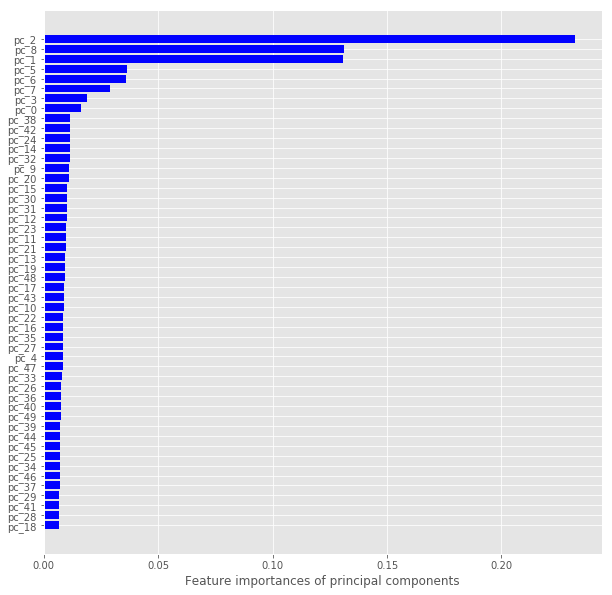

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(pca_range, df_feat_imp[1],align='center',color='blue')
ax.set_yticks(pca_range)
ax.set_yticklabels(df_feat_imp[0])
ax.invert_yaxis() 
ax.set_xlabel('Feature importances of principal components')
plt.show()

### Cluster restaurants from their category information
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [4]:
# get all the restaurants data with unique business_id from business data
# take the values of the column that contains categories text data
df_categories = df.drop_duplicates(['business_id'])
doc_categories = df_categories['categories'].values
doc_categories.dtype, doc_categories.shape

(dtype('O'), (4832,))

In [5]:
restaurants = df_categories['business_id'].values
# split into train and test data
from sklearn.cross_validation import train_test_split
categories_train, categories_test, target_train, target_test = train_test_split(
    doc_categories,
    restaurants,
    test_size = 0.4,
    random_state = 42
)

/Users/yaru/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# NLP
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)
vector_categories_train = vectorizer.fit_transform(categories_train).toarray()
vector_doc_categories = vectorizer.transform(doc_categories).toarray()
vector_categories_train.shape, vector_doc_categories.shape

((2899, 389), (4832, 389))

In [7]:
# cluster restaurants with KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10)
kmeans.fit(vector_categories_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
# make predictionon all categories data
assigened_cluster = kmeans.predict(vector_doc_categories)

In [9]:
# cluster centroids
print('cluster centers:')
print(kmeans.cluster_centers_)

cluster centers:
[[-2.27682456e-18 -1.51788304e-18 -1.08420217e-19 ... -1.89735380e-19
  -5.63785130e-18 -5.20417043e-18]
 [ 1.90389962e-03  3.00197146e-03  4.05642193e-04 ...  5.93749491e-04
   3.71890084e-03  1.58120852e-02]
 [ 1.08420217e-18  3.46944695e-18 -1.08420217e-19 ... -1.89735380e-19
   4.63804354e-03  1.21430643e-17]
 ...
 [ 1.19262239e-18  4.55364912e-18 -1.08420217e-19 ... -1.62630326e-19
   3.74863257e-03  1.64798730e-17]
 [ 1.19262239e-18  4.55364912e-18 -1.08420217e-19 ... -1.62630326e-19
  -5.63785130e-18  1.64798730e-17]
 [ 9.75781955e-19  1.95156391e-18 -1.08420217e-19 ... -1.89735380e-19
   3.79571093e-03  6.07153217e-18]]
